 <div style="position:relative; background-color:#800000; padding:30px;">
    <div style="text-align:center; color:white; font-weight:bold; font-size:30px;">CUSTOMER SEGMENTATION OF ELECTRIC VEHICLE</div>
    <div style="position:absolute; color:white;font-weight:bold; font-size:15px; top:0; right:0;">By :- Ashu Kumar</div>
  </div> 

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>OBJECTIVE</b></font>
  </span>
</center>


# <u>*Objective of Customer Segmentation are :-<u>* #
+ Understanding Customer Preferences
+ Targeted Marketing and Communication
+ Product Customization and Innovation
+ Optimizing Distribution and Sales Channels
+ Improving Customer Service and Support

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>TABLE OF CONTENT</b></font>
  </span>
</center>

## <u>Table of Content<u>
-  IMPORTING LIBRARIES

-  LOADING DATA FROM IBM DB2 DATABASE

-  LOADING DATA FROM LOCAL COMPUTER

-  CONCATENATE THE DATA 
    
-  EXPLORARTORY DATA ANALYSIS (EDA)
-  FEATURE ENGINEERING
-  DATA VISUALIZATION
-  CORRELATION MATRIX
-  DIMENSIONALITY REDUCTION
-  MODELLING
-  MODEL EVALUATION
-  PROFILING
-  CONCLUSION


<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>IMPORTING LIBRARIES</b></font>
  </span>
</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import ibm_db
import ibm_db_dbi
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>LOADING DATA FROM IBM DB2 DATABASE</b></font>
  </span>
</center>

## <u>Create the DB2 database connection</u> ##

**Lets build the dsn connection string using the credentials**

In [2]:
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "bludb"
dsn_hostname = "1bbf73c5-d84a-4bb0-85b9-ab1a4348f4a4.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud"
dsn_port = "32286"
dsn_protocol = "TCPIP"
dsn_uid = "xdp60636"
dsn_pwd = "xG33pIUr0VlrCYs3"
dsn_security = "SSL"              
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  bludb as user:  xdp60636 on host:  1bbf73c5-d84a-4bb0-85b9-ab1a4348f4a4.c3n41cmd0nqnrk39u98g.databases.appdomain.cloud


Congratulations we were able to connect successfully.

## <u>*Query data in the table*<u> ##

**In this step we will retrieve data we inserted into the NEW table.**

In [3]:
selectQuery = "select * from NEW"

selectStmt = ibm_db.exec_immediate(conn, selectQuery)

ibm_db.fetch_both(selectStmt)

{'ID': 5524,
 0: 5524,
 'YEAR_BIRTH': 1957,
 1: 1957,
 'EDUCATION': 'Graduation',
 2: 'Graduation',
 'MARITAL_STATUS': 'Single',
 3: 'Single',
 'INCOME': '58138.0',
 4: '58138.0',
 'KIDHOME': 0,
 5: 0,
 'TEENHOME': 0,
 6: 0,
 'DT_CUSTOMER': datetime.date(2012, 9, 4),
 7: datetime.date(2012, 9, 4),
 'RECENCY': 58,
 8: 58,
 'MNTWINES': 635,
 9: 635,
 'MNTFRUITS': 88,
 10: 88,
 'MNTMEATPRODUCTS': 546,
 11: 546,
 'MNTFISHPRODUCTS': 172,
 12: 172,
 'MNTSWEETPRODUCTS': 88,
 13: 88,
 'MNTGOLDPRODS': 88,
 14: 88,
 'NUMDEALSPURCHASES': 3,
 15: 3,
 'NUMWEBPURCHASES': 8,
 16: 8,
 'NUMCATALOGPURCHASES': 10,
 17: 10,
 'NUMSTOREPURCHASES': 4,
 18: 4,
 'NUMWEBVISITSMONTH': 7,
 19: 7,
 'ACCEPTEDCMP3': 0,
 20: 0,
 'ACCEPTEDCMP4': 0,
 21: 0,
 'ACCEPTEDCMP5': 0,
 22: 0,
 'ACCEPTEDCMP1': 0,
 23: 0,
 'ACCEPTEDCMP2': 0,
 24: 0,
 'COMPLAIN': 0,
 25: 0,
 'Z_COSTCONTACT': 3,
 26: 3,
 'Z_REVENUE': 11,
 27: 11,
 'RESPONSE': 1,
 28: 1}

## <u>*Retrieve data into Pandas*<u> ##

**In this step we will retrieve the contents of the NEW table into a Pandas dataframe**

In [4]:
pconn = ibm_db_dbi.Connection(conn)

selectQuery = "select * from NEW"

pdf = pd.read_sql(selectQuery, pconn)

pdf

ID  YEAR_BIRTH   EDUCATION MARITAL_STATUS   INCOME  KIDHOME  TEENHOME  \
0     5524        1957  Graduation         Single  58138.0        0         0   
1     2174        1954  Graduation         Single  46344.0        1         1   
2     4141        1965  Graduation       Together  71613.0        0         0   
3     6182        1984  Graduation       Together  26646.0        1         0   
4     5324        1981         PhD        Married  58293.0        1         0   
..     ...         ...         ...            ...      ...      ...       ...   
995   5184        1995  Graduation         Single  34824.0        0         0   
996   8492        1978  Graduation       Together  75437.0        0         0   
997  11188        1957  Graduation       Together  26091.0        1         1   
998   1212        1973  Graduation        Married  52845.0        1         0   
999   9097        1956  Graduation       Divorced  46086.0        0         1   

    DT_CUSTOMER  RECENCY  MNTWINES  MNTFRUITS  MNTMEATPRODUCTS  \
0    2012-09-04       58       635         88              546   
1    2014-03-08       38        11          1                6   
2    2013-08-21       26       426         49              127   
3    2014-02-10       26        11          4               20   
4    2014-01-19       94       173         43              118   
..          ...      ...       ...        ...              ...   
995  2014-03-26       65         4          2               11   
996  2013-11-09       25       795          0              545   
997  2014-02-25       84        15         10               19   
998  2013-08-13        7       384         25              292   
999  2013-11-03       34       244          8               32   

     MNTFISHPRODUCTS  MNTSWEETPRODUCTS  MNTGOLDPRODS  NUMDEALSPURCHASES  \
0                172                88            88                  3   
1                  2                 1             6                  2   
2                111                21            42                  1   
3                 10                 3             5                  2   
4                 46                27            15                  5   
..               ...               ...           ...                ...   
995                2                 0             4                  1   
996               95                58             0                  1   
997                8                17            20                  3   
998              130                41            64                  3   
999                7                 2            50                  4   

     NUMWEBPURCHASES  NUMCATALOGPURCHASES  NUMSTOREPURCHASES  \
0                  8                   10                  4   
1                  1                    1                  2   
2                  8                    2                 10   
3                  2                    0                  4   
4                  5                    3                  6   
..               ...                  ...                ...   
995                1                    0                  2   
996                8                    4                 10   
997                2                    1                  3   
998                8                    8                  6   
999                3                    1                  8   

     NUMWEBVISITSMONTH  ACCEPTEDCMP3  ACCEPTEDCMP4  ACCEPTEDCMP5  \
0                    7             0             0             0   
1                    5             0             0             0   
2                    4             0             0             0   
3                    6             0             0             0   
4                    5             0             0             0   
..                 ...           ...           ...           ...   
995                  6             0             0             0   
996                  6      

In [5]:
pdf.columns

Index(['ID', 'YEAR_BIRTH', 'EDUCATION', 'MARITAL_STATUS', 'INCOME', 'KIDHOME',
       'TEENHOME', 'DT_CUSTOMER', 'RECENCY', 'MNTWINES', 'MNTFRUITS',
       'MNTMEATPRODUCTS', 'MNTFISHPRODUCTS', 'MNTSWEETPRODUCTS',
       'MNTGOLDPRODS', 'NUMDEALSPURCHASES', 'NUMWEBPURCHASES',
       'NUMCATALOGPURCHASES', 'NUMSTOREPURCHASES', 'NUMWEBVISITSMONTH',
       'ACCEPTEDCMP3', 'ACCEPTEDCMP4', 'ACCEPTEDCMP5', 'ACCEPTEDCMP1',
       'ACCEPTEDCMP2', 'COMPLAIN', 'Z_COSTCONTACT', 'Z_REVENUE', 'RESPONSE'],
      dtype='object')

## <u>*Rename the Columns of Data*<u> ##

**In this step we will rename the columns of data that we retrieve from the database.**

In [6]:
original_headers = ['ID', 'YEAR_BIRTH', 'EDUCATION', 'MARITAL_STATUS', 'INCOME', 'KIDHOME',
                    'TEENHOME', 'DT_CUSTOMER', 'RECENCY', 'MNTWINES', 'MNTFRUITS',
                    'MNTMEATPRODUCTS', 'MNTFISHPRODUCTS', 'MNTSWEETPRODUCTS',
                    'MNTGOLDPRODS', 'NUMDEALSPURCHASES', 'NUMWEBPURCHASES',
                    'NUMCATALOGPURCHASES', 'NUMSTOREPURCHASES', 'NUMWEBVISITSMONTH',
                    'ACCEPTEDCMP3', 'ACCEPTEDCMP4', 'ACCEPTEDCMP5', 'ACCEPTEDCMP1',
                    'ACCEPTEDCMP2', 'COMPLAIN', 'Z_COSTCONTACT', 'Z_REVENUE', 'RESPONSE']

# New column headers
new_headers = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
               'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
               'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']



# Rename the column headers using the new_headers list
pdf = pdf.rename(columns=dict(zip(original_headers, new_headers)))

# Print the updated column headers
print(pdf.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>LOADING DATA FROM LOCAL COMPUTER</b></font>
  </span>
</center>

**In this step we load the data from the local file to the jupyter notebook in the pandas dataframe.**

In [7]:
ldf = pd.read_csv(r"C:\Users\91965\Downloads\output2.csv")
ldf

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0     10473        1956         PhD          Widow  78028.0        0   
1      7962        1987         PhD         Single  95169.0        0   
2      9984        1981    2n Cycle        Married  56337.0        1   
3      5527        1987  Graduation       Together  22434.0        1   
4      6374        1954         PhD        Married  36930.0        0   
...     ...         ...         ...            ...      ...      ...   
1235  10870        1967  Graduation        Married  61223.0        0   
1236   4001        1946         PhD       Together  64014.0        2   
1237   7270        1981  Graduation       Divorced  56981.0        0   
1238   8235        1956      Master       Together  69245.0        0   
1239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            1  2012-09-10       38       158         19              288   
1            0  2013-10-09        1      1285         21              449   
2            1  2013-03-27       25       349         16              144   
3            0  2013-02-13       25         4         12               11   
4            1  2013-05-17       50       223          2               31   
...        ...         ...      ...       ...        ...              ...   
1235         1  2013-06-13       46       709         43              182   
1236         1  2014-06-10       56       406          0               30   
1237         0  2014-01-25       91       908         48              217   
1238         1  2014-01-24        8       428         30              214   
1239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                  25                 0            38                  1   
1                 106                20            20                  1   
2                  28                 5           182                  5   
3                   3                13            15                  2   
4                   0                 2            39                  5   
...               ...               ...           ...                ...   
1235               42               118           247                  2   
1236                0                 0             8                  7   
1237               32                12            24                  1   
1238               80                30            61                  2   
1239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   6                    4                  9   
1                   4                    3                  4   
2                   8                    5                  4   
3                   2                    0                  3   
4                   5                    2                  4   
...               ...                  ...                ...   
1235                9                    3                  4   
1236                8                    2                  5   
1237                2                    3                 13   
1238                6                    5                 10   
1239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             1             1   
1                     1             0             0             1   
2                     8             1             0             0   
3                     8             0             0             0   
4                     8             0             0             0   
...                 ...           ...           ...           ...   
1235                  5             0     

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>CONCATENATE THE DATA</b></font>
  </span>
</center>

**In this step we concat the data from the database and local file into one Dataframe.**

In [8]:
df = pd.concat([ldf, pdf], axis=0)
df.reset_index(drop=True, inplace=True)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0     10473        1956         PhD          Widow  78028.0        0   
1      7962        1987         PhD         Single  95169.0        0   
2      9984        1981    2n Cycle        Married  56337.0        1   
3      5527        1987  Graduation       Together  22434.0        1   
4      6374        1954         PhD        Married  36930.0        0   
...     ...         ...         ...            ...      ...      ...   
2235   5184        1995  Graduation         Single  34824.0        0   
2236   8492        1978  Graduation       Together  75437.0        0   
2237  11188        1957  Graduation       Together  26091.0        1   
2238   1212        1973  Graduation        Married  52845.0        1   
2239   9097        1956  Graduation       Divorced  46086.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            1  2012-09-10       38       158         19              288   
1            0  2013-10-09        1      1285         21              449   
2            1  2013-03-27       25       349         16              144   
3            0  2013-02-13       25         4         12               11   
4            1  2013-05-17       50       223          2               31   
...        ...         ...      ...       ...        ...              ...   
2235         0  2014-03-26       65         4          2               11   
2236         0  2013-11-09       25       795          0              545   
2237         1  2014-02-25       84        15         10               19   
2238         0  2013-08-13        7       384         25              292   
2239         1  2013-11-03       34       244          8               32   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                  25                 0            38                  1   
1                 106                20            20                  1   
2                  28                 5           182                  5   
3                   3                13            15                  2   
4                   0                 2            39                  5   
...               ...               ...           ...                ...   
2235                2                 0             4                  1   
2236               95                58             0                  1   
2237                8                17            20                  3   
2238              130                41            64                  3   
2239                7                 2            50                  4   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   6                    4                  9   
1                   4                    3                  4   
2                   8                    5                  4   
3                   2                    0                  3   
4                   5                    2                  4   
...               ...                  ...                ...   
2235                1                    0                  2   
2236                8                    4                 10   
2237                2                    1                  3   
2238                8                    8                  6   
2239                3                    1                  8   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             1             1   
1                     1             0             0             1   
2                     8             1             0             0   
3                     8             0             0             0   
4                     8             0             0             0   
...                 ...           ...           ...           ...   
2235                  6             0     

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>EXPLORARTORY DATA ANALYSIS (EDA)</b></font>
  </span>
</center>

**Retrieve the shape of the dataset, which indicates the number of rows and columns it contains.**

In [9]:
df.shape

(2240, 29)

**Conduct an examination of the columns present in the dataset.**

In [10]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

**Retrieve the information summary of the dataset, including details such as column names, data types, non-null counts, and memory usage.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above output, we can conclude and note that:

  -  There are missing values in income
  -  Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
  -  There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to          encode them into numeric forms later. 


**Perform a statistical summary of the dataset consisting of numerical values.**

In [12]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

From the above output, we can conclude and note that:

   -  The 75th percentile of the income is 68,522, and the maximum income is 666,666. These values suggest that there may be           outliers present in the income data.

**Perform a statistical summary of the dataset consisting of categorical variables.**

In [13]:
df.describe(include=['object','bool'])

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8        1072
top     Graduation        Married  2013-02-14
freq          1127            864           9

From the above output, we can conclude and note that: 

   - There are three columns in our dataframe with object data types: Education, Marital_Status, and Dt_Customer.
   - Among the columns with object data types, one of them is Dt_Customer. Although it is currently classified as an object          data type, it should ideally be a datetime data type. We will proceed to change the data type of Dt_Customer column              accordingly.     

**Conduct an examination of the distinct values present in each column of the dataset.**

In [14]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer            1072
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

After the ID column, the column with the most distinct values in the dataset is Income, indicating a wide range of income levels among the observations. Following Income, the Dt_Customer column has the next highest number of distinct values, suggesting a range of different customer registration dates.

**Perform an assessment of the presence of null values in the columns of the dataset.**

In [15]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Upon closer inspection, it is evident that the only column containing blank cells or missing values is the Income column.

**Remove any cells with missing values from the dataset.**

In [16]:
df.dropna(inplace=True)

**Let's perform another check to verify if all the null values have been successfully removed from the dataset.**

In [17]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

We have confirmed that there are no empty cells present in the dataset.

**Perform a check for duplicate data entries within the dataset to identify and assess any occurrences of duplicated records.**

In [18]:
df.duplicated().sum()

0

Upon careful examination, it has been determined that there are no duplicated values present in the dataset.

**Again see the shape of the dataset after the droping the blanks**

In [19]:
df.shape

(2216, 29)

**Perform a count of unique values for each column in the dataset.**

In [20]:
value_counts = {}
for column in df.columns:
    value_counts[column] = df[column].value_counts()

for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print()

Value counts for column 'ID':
10473    1
1184     1
5304     1
309      1
3406     1
        ..
5796     1
7500     1
10092    1
2499     1
9097     1
Name: ID, Length: 2216, dtype: int64

Value counts for column 'Year_Birth':
1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1952    52
1958    52
1977    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1967    44
1963    44
1982    44
1962    44
1951    42
1964    41
1957    41
1986    41
1983    41
1980    39
1984    38
1981    38
1961    35
1953    35
1985    32
1949    30
1988    29
1950    29
1989    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1944     7
1943     6
1993     5
1995     5
1994     3
1996     2
1940     1
1900     1
1893     1
1899     1
1941     1
Name: Year_Birth, dtype: int64

Value counts for column 'Education':
Graduation    1116
PhD            481
Master         36

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>FEATURE ENGINEERING</b></font>
  </span>
</center>

**Convert the 'Dt_Customer' column from an object data type to a datetime data type.**

In [21]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
df["Dt_Customer"].dtypes

dtype('<M8[ns]')

The data type '<M8[ns]' represents a datetime data type in NumPy

**Calculate the age of each customer based on their birth date and the current date.**

In [22]:
df["Age"] = 2023-df["Year_Birth"]
df["Age"]

0       67
1       36
2       42
3       36
4       69
        ..
2235    28
2236    45
2237    66
2238    50
2239    67
Name: Age, Length: 2216, dtype: int64

**Calculate the total expenditure on different items.**

In [23]:
df["Spent"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + \
              df["MntSweetProducts"] + df["MntGoldProds"]

df["Spent"]

0        528
1       1901
2        724
3         58
4        297
        ... 
2235      23
2236    1493
2237      89
2238     936
2239     343
Name: Spent, Length: 2216, dtype: int64

**Determining current living arrangement: whether in a committed partnership or as an individual**

In [24]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                                    "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Living_With"].value_counts()

Partner    1430
Alone       786
Name: Living_With, dtype: int64

**Feature indicating total children living in the household**

In [25]:
df["Children"]=df["Kidhome"]+df["Teenhome"]

**Attribute representing the overall count of individuals comprising the household.**

In [26]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]
df["Family_Size"].value_counts()

3    880
2    757
4    296
1    252
5     31
Name: Family_Size, dtype: int64

**Characteristic relating to the state of being a parent**

In [27]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

**Partitioning education levels into three distinct groups.**

In [28]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", 
                                             "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Education"].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

**Rename the few columns of the data.**

In [29]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

**Dropping some of the unnecessary features**

In [30]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [31]:
df.head(5)

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0   Postgraduate  78028.0        0         1       38    158      19   288   
1   Postgraduate  95169.0        0         0        1   1285      21   449   
2  Undergraduate  56337.0        1         1       25    349      16   144   
3       Graduate  22434.0        1         0       25      4      12    11   
4   Postgraduate  36930.0        0         1       50    223       2    31   

   Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0    25       0    38                  1                6   
1   106      20    20                  1                4   
2    28       5   182                  5                8   
3     3      13    15                  2                2   
4     0       2    39                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  9                  7             0   
1                    3                  4                  1             0   
2                    5                  4                  8             1   
3                    0                  3                  8             0   
4                    2                  4                  8             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             1             1             0             0         0         1   
1             0             1             1             0         0         1   
2             0             0             1             0         0         1   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Spent Living_With  Children  Family_Size  Is_Parent  
0   67    528       Alone         1            2          1  
1   36   1901       Alone         0            1          0  
2   42    724     Partner         2            4          1  
3   36     58     Partner         1            3          1  
4   69    297     Partner         1            3          1

In [32]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     26.356047   166.995939    37.637635    27.028881    43.965253   
std      39.793917   224.283273    54.752082    41.072046    51.815414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    68.000000    12.000000     8.000000    24.500000   
75%      33.000000   232.250000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   262.000000   321.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2216.000000      2216.000000          2216.000000   
mean            2.323556         4.085289             2.671029   
std             1.923716         2.740951             2.926734   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      27.000000     5.000000     0.000000     1.000000     0.000000  
25%      46.000000    69.000000     0.000000     2.000000     0.000000  
50%      53.000000   396.500000     1.000000     3.000000     1.000000  
75%      64.000000  1048.000000     1.000000     3.000000     1.000000  
max     130.000000  2525.000000     3.000000     5.000000     1.000000

Based on the analysis from the descriptive statistics, it appears that the "income" and "age" columns contain outliers. Therefore, it is necessary to remove these outliers from the dataset.

**Dropping the outliers by setting a upper limit on Age and income**

In [33]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
df.shape

(2212, 29)

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>DATA VISUALIZATION</b></font>
  </span>
</center>

## <U>Univarate Data Analysis<U> ##

**Perform data visualization to present relevant numerical columns in the dataset.**

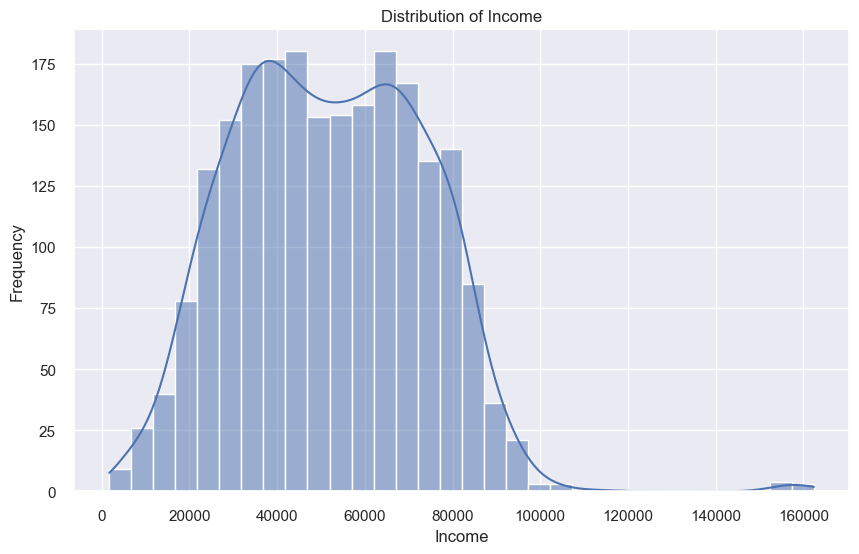

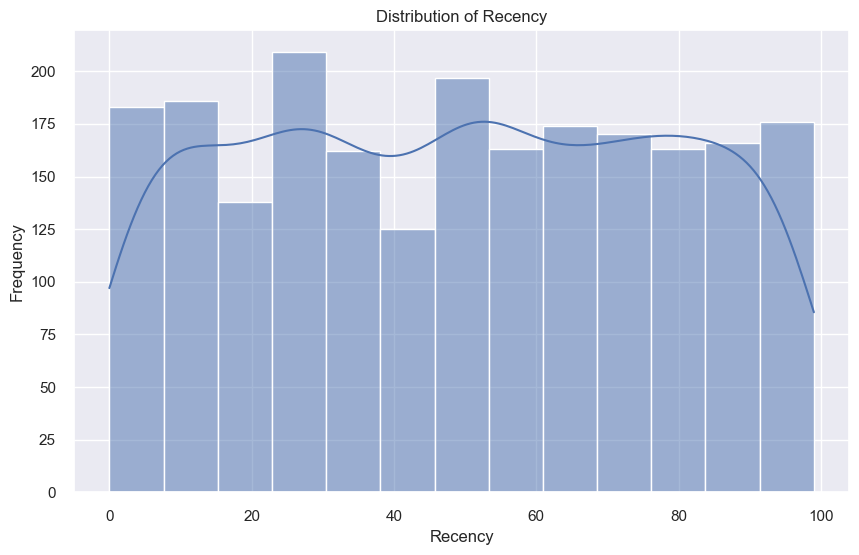

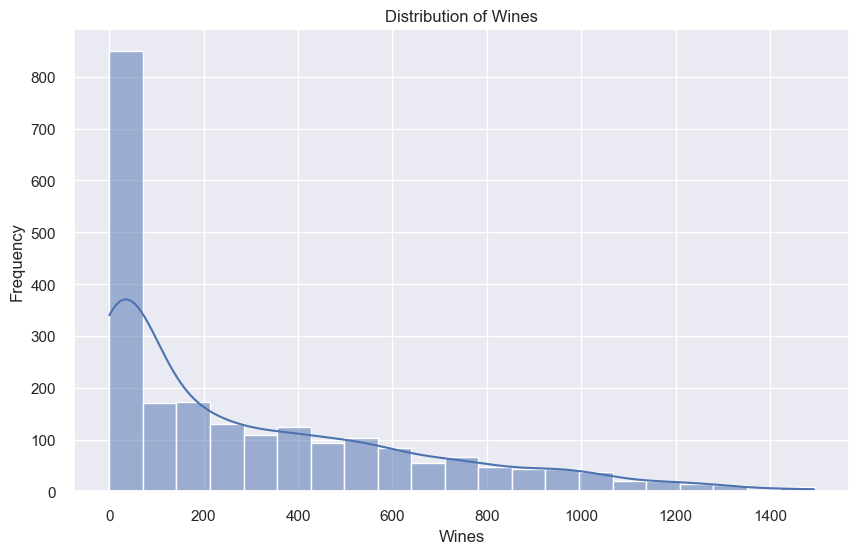

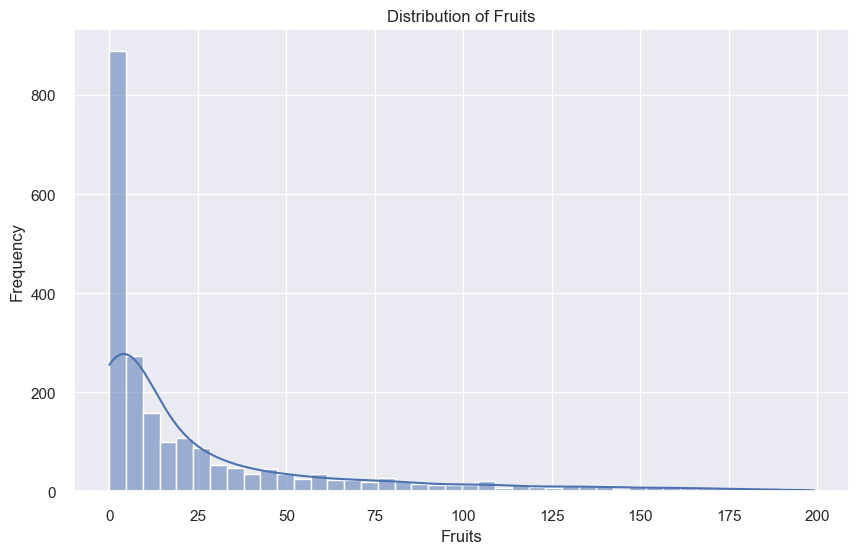

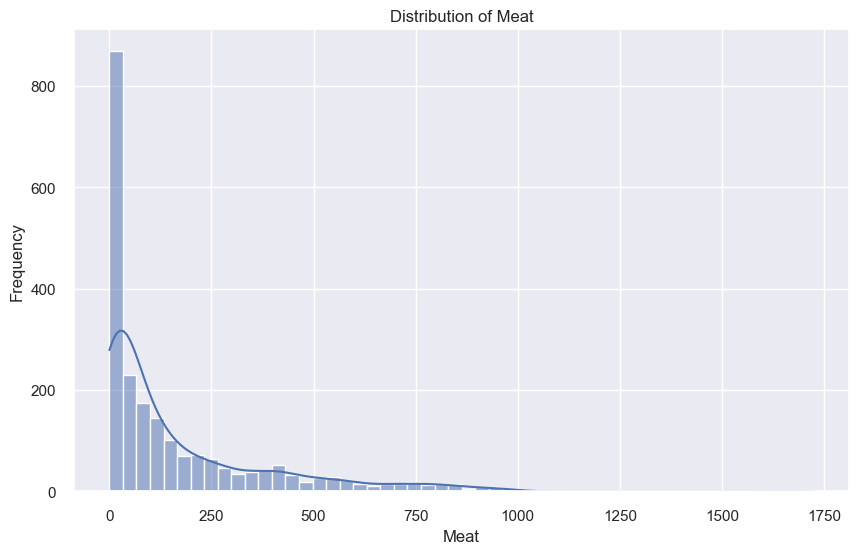

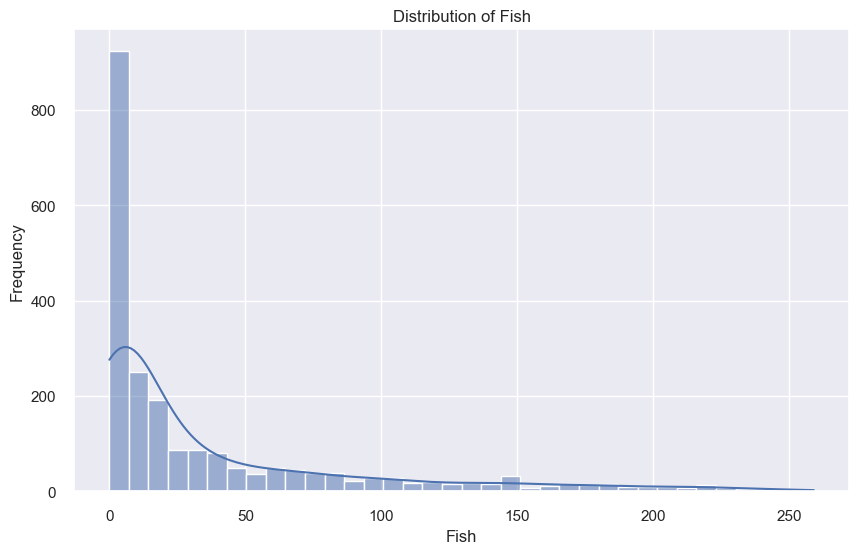

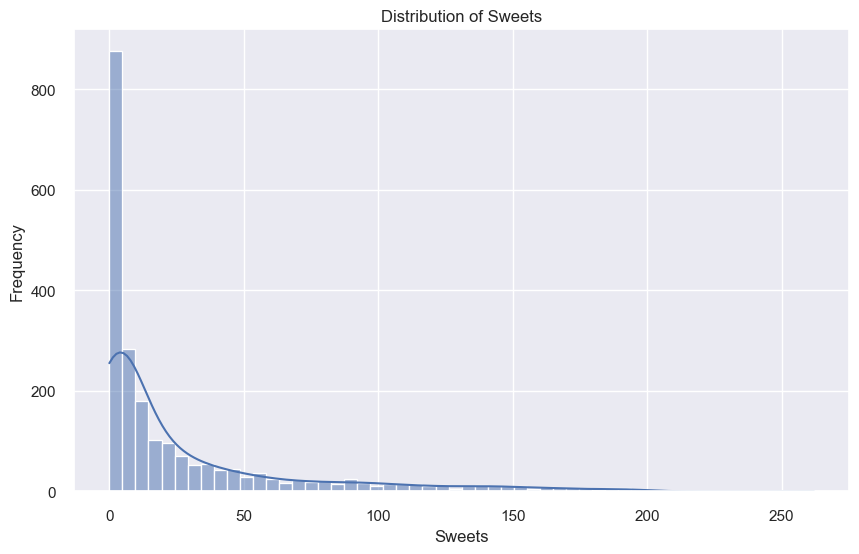

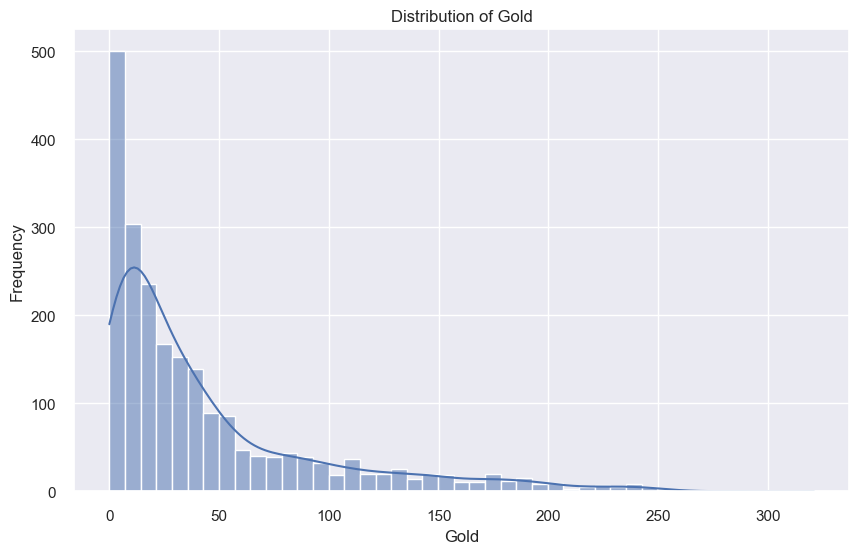

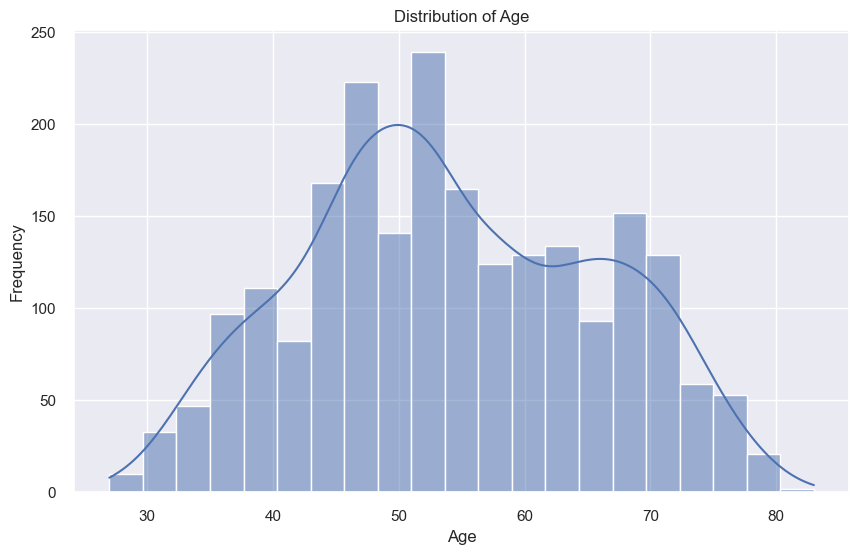

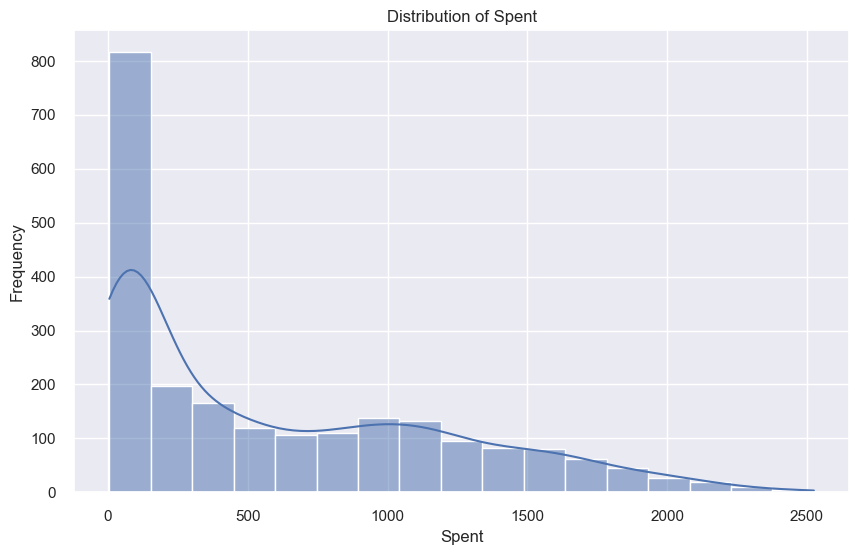

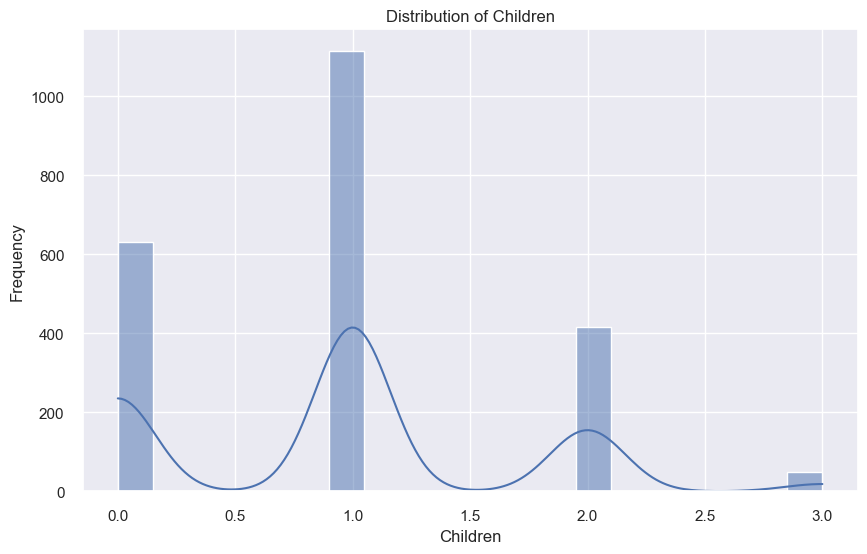

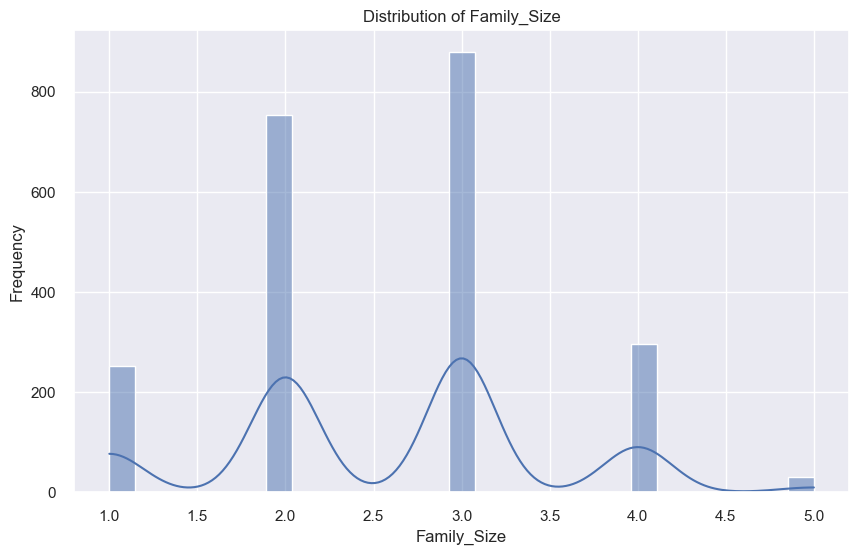

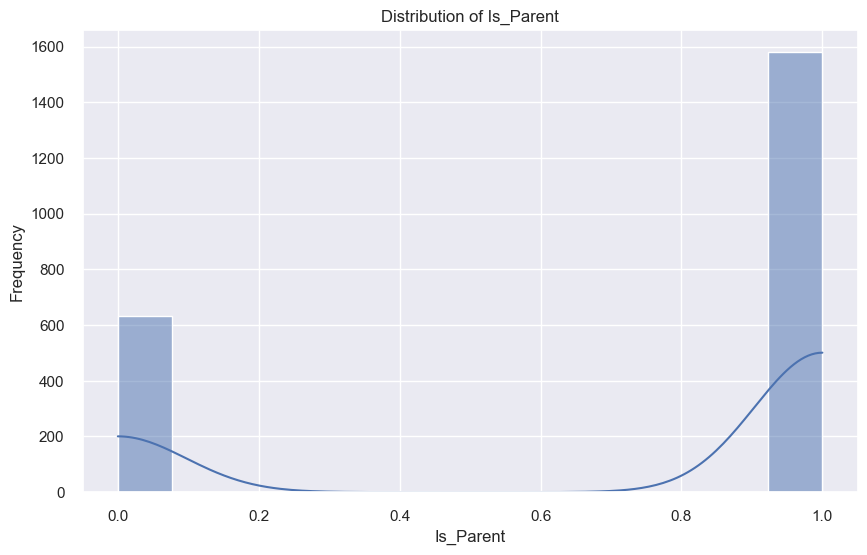

In [34]:
numeric_variables = ['Income','Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold','Age', 'Spent',
       'Children', 'Family_Size', 'Is_Parent']
for var in numeric_variables:
    plt.figure(figsize=(10,6))
    sns.histplot(df[var],kde=True)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()

From the above output, we can conclude and note that: 

  -  The income distribution is primarily concentrated between 20,000 and 100,000 with an approximate average of 50,000. 
  -  The distributions of wines, fruits, meat, fish, sweet products, and gold products show a decreasing trend as the values          increase.
  -  The age distribution indicates a higher number of individuals in older age groups, particularly after the age of 50.
  -  The distribution of spending also exhibits a decreasing trend as the amount spent increases.
  -  The distribution of children reveals that the majority of buyers have one child, followed by those with no children, two        children, and three children.
  -  Based on the distribution of family size, it is evident that the most common family size is three people, followed by two        people, four people, and finally, single-person households.

**Perform data visualization to present relevant categorical columns in the dataset.**

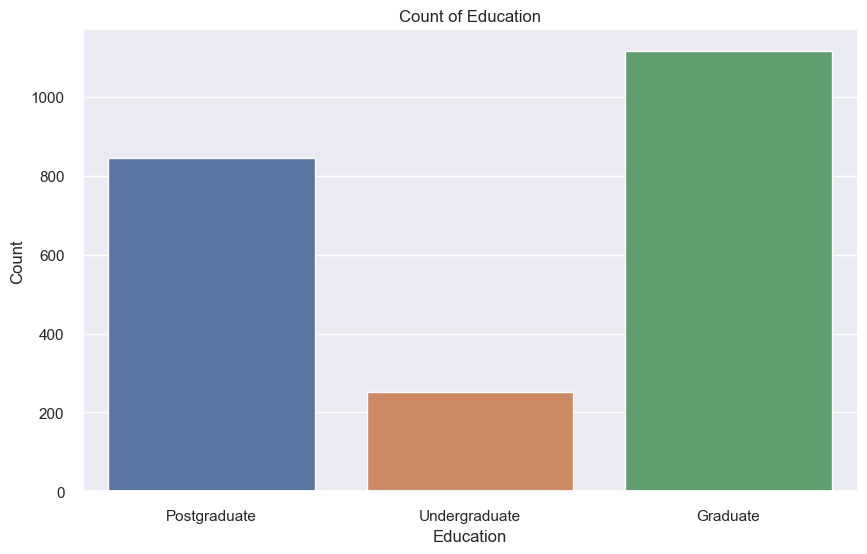

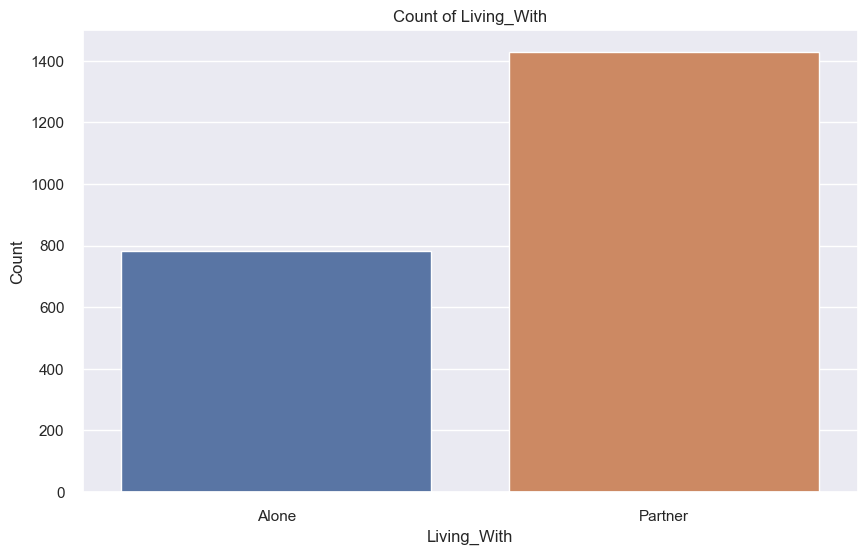

In [35]:
cate_vari = ['Education','Living_With']
for var in cate_vari:
    plt.figure(figsize=(10,6))
    sns.countplot(x=var,data=df)
    plt.title(f"Count of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()

From the above output, we can conclude and note that: 
    
  -  The majority of customers have an undergraduate education, followed by postgraduate education, and the least common              education level is high school.
  -  Customers who have a partner are more prevalent compared to those who are alone.

**Check the relation between the Income and Spent**

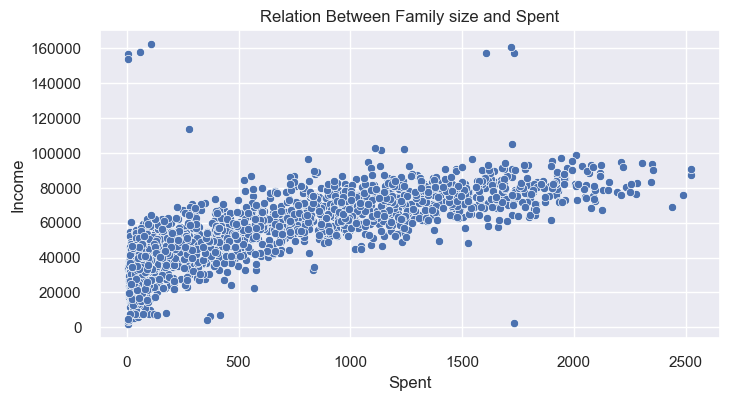

In [36]:
plt.figure(figsize=(8,4))
sns.scatterplot(y='Income',x='Spent',data=df)
plt.title('Relation Between Family size and Spent')
plt.show()

There is positive linear relationship between Income and Spent.

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>CORRELATION MATRIX</b></font>
  </span>
</center>

Next, we will analyze the correlation between the features in the dataset, focusing only on the numerical attributes while excluding the categorical variables at this stage.

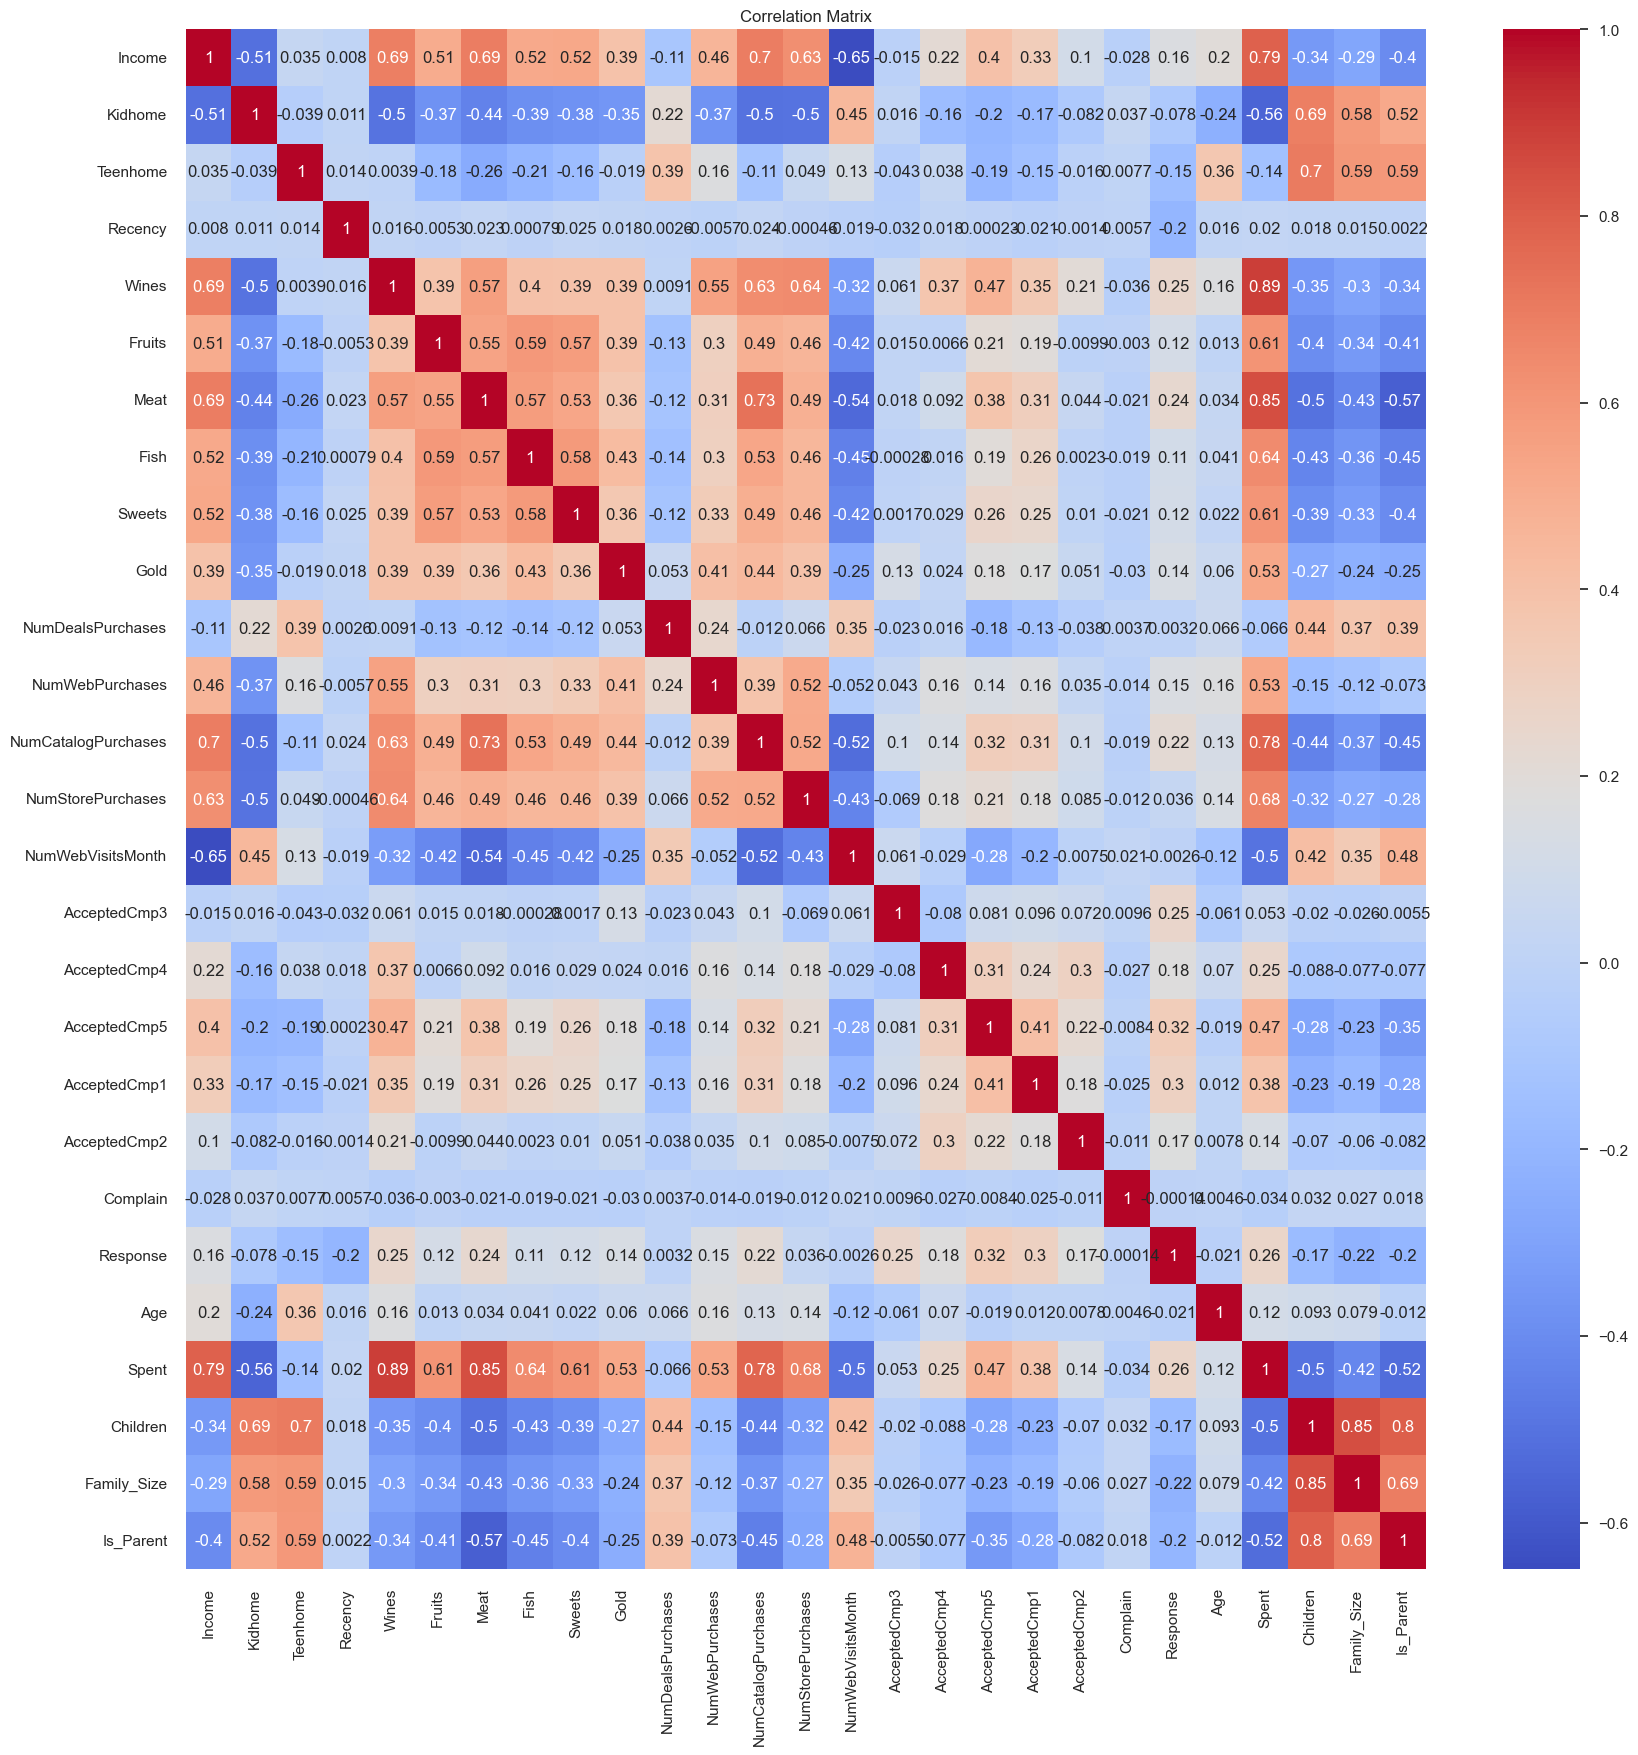

In [37]:
corr_matr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the analysis above, we can observe the correlation between different columns in the dataset. This correlation analysis provides insights into the strength and direction of relationships between the variables, helping us understand how changes in one variable relate to changes in another.

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>DIMENSIONALITY REDUCTION</b></font>
  </span>
</center>

**Obtain a list of categorical variables.**

In [38]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


**Perform label encoding on the variables with object data type.**

In [39]:
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

**Create a copy of the data and apply scaling to the variables**

In [40]:
ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [41]:
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0   0.571657  1.211258 -0.822754  0.908097 -0.380813 -0.436735 -0.184461   
1   0.571657  2.007683 -0.822754 -0.929699 -1.659472  2.905032 -0.134128   
2   2.036900  0.203425  1.040021  0.908097 -0.830072  0.129616 -0.259961   
3  -0.893586 -1.371817  1.040021 -0.929699 -0.830072 -0.893374 -0.360628   
4   0.571657 -0.698287 -0.822754  0.908097  0.033887 -0.243998 -0.612295   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  0.539554 -0.230986 -0.658360 -0.114631          -0.688432         0.697355   
1  1.257651  1.248205 -0.171526 -0.462825          -0.688432        -0.032155   
2 -0.102718 -0.176202 -0.536652  2.670923           1.390492         1.426865   
3 -0.695929 -0.632742 -0.341918 -0.559545          -0.168701        -0.761665   
4 -0.606724 -0.687527 -0.609677 -0.095286           1.390492         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0             0.453643           0.982551           0.692181     -0.282048   
1             0.111982          -0.555814          -1.781997     -0.282048   
2             0.795303          -0.555814           1.104543      3.545497   
3            -0.913000          -0.863487           1.104543     -0.282048   
4            -0.229679          -0.555814           1.104543     -0.282048   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0      3.533809      3.569192     -0.261914     -0.117256  -0.09552  2.375425   
1     -0.282981      3.569192      3.818045     -0.117256  -0.09552  2.375425   
2     -0.282981     -0.280175      3.818045     -0.117256  -0.09552  2.375425   
3     -0.282981     -0.280175     -0.261914     -0.117256  -0.09552 -0.420977   
4     -0.282981     -0.280175     -0.261914     -0.117256  -0.09552 -0.420977   

        Age     Spent  Living_With  Children  Family_Size  Is_Parent  
0  1.103830 -0.131592    -1.349603  0.069987    -0.654644   0.632456  
1 -1.545980  2.147711    -1.349603 -1.264598    -1.758359  -1.581139  
2 -1.033114  0.193785     0.740959  1.404572     1.552784   0.632456  
3 -1.545980 -0.911834     0.740959  0.069987     0.449070   0.632456  
4  1.274785 -0.515073     0.740959  0.069987     0.449070   0.632456

**Initialize Principal Component Analysis (PCA) to reduce the dimensionality of the features to 3.**

In [42]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.252765e-16  2.959362 -5.887109 -2.562909 -0.863089  2.260887   
col2  2212.0 -6.424437e-18  1.707970 -4.297511 -1.348213 -0.148369  1.254264   
col3  2212.0 -3.613746e-17  1.384262 -3.195002 -0.717632 -0.155850  0.284135   

           max  
col1  8.542129  
col2  5.963818  
col3  8.647524

**Create a 3D projection of the data in the reduced dimension**

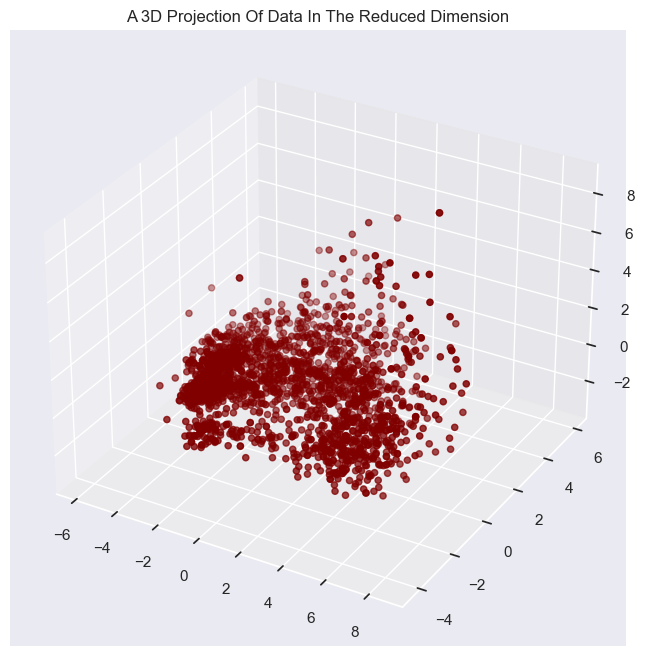

In [43]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>MODELLING</b></font>
  </span>
</center>

**Conduct a quick examination of the elbow method to determine the optimal number of clusters.**

Elbow Method to determine the number of clusters to be formed:


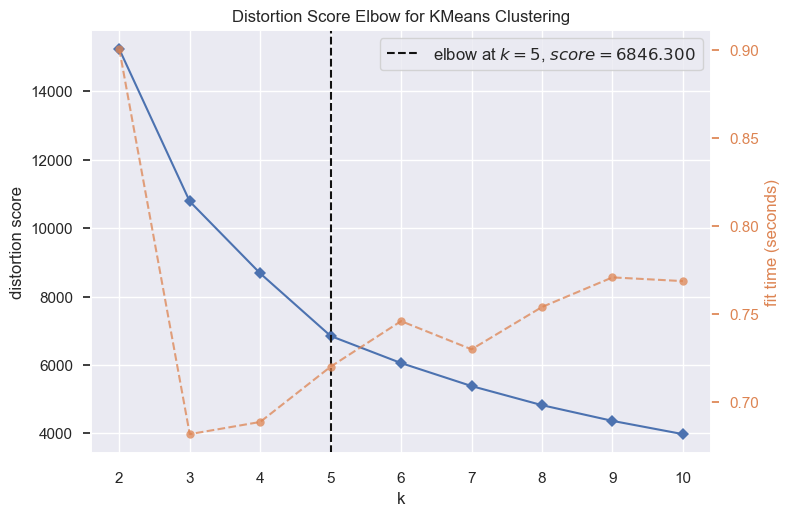

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that five will be an optimal number of clusters for this data. Next, we will be fitting the k-means Clustering Model to get the final clusters.

**Initialize the k-means clustering model**

In [45]:
kmeans = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

yhat_kmeans = kmeans.fit_predict(PCA_ds)

PCA_ds["Clusters"] = yhat_kmeans

df["Clusters"] = yhat_kmeans

**To examine the clusters formed let's have a look at the 3-D distribution of the clusters.**

In [46]:
figure = px.scatter_3d(PCA_ds,
                    color='Clusters',
                    x=PCA_ds["col1"],
                    y =PCA_ds["col2"],
                    z =PCA_ds["col3"],
                    category_orders = {"Clusters": ["0", "1", "2", "3", "4","5"]}
                    )
figure.update_layout()
figure.show()

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>MODEL EVALUATION</b></font>
  </span>
</center>

**Let us have a look at the group distribution of clustring**

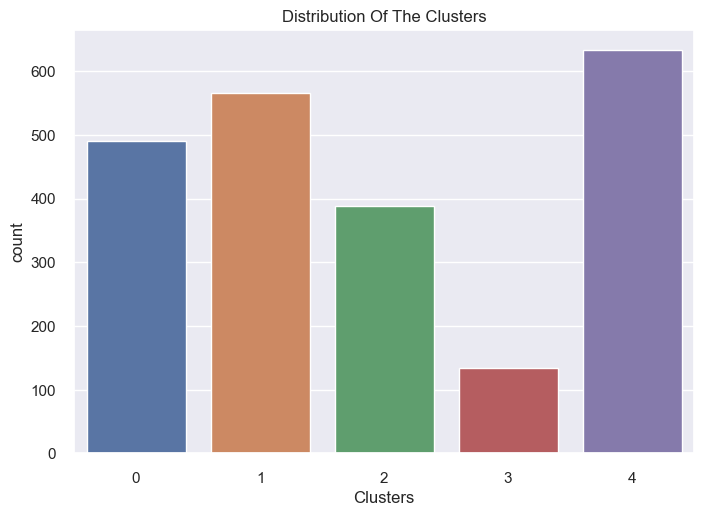

In [47]:
sns.countplot(x=df["Clusters"],data=df)
plt.title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

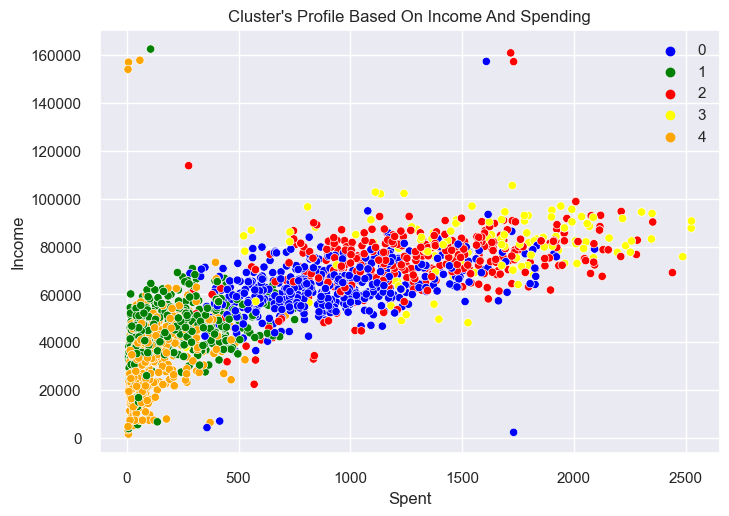

In [48]:
palette = ['blue', 'green', 'red', 'yellow', 'orange']
sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"],palette=palette)
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

<U>Income vs spending plot shows the clusters pattern<U>

   - Group 0: high spending & average income
   - Group 1: low spending & average income
   - Group 2: average spending & high income
   - Group 3: high spending & high income
   - Group 4: low spending & low income

**Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold**

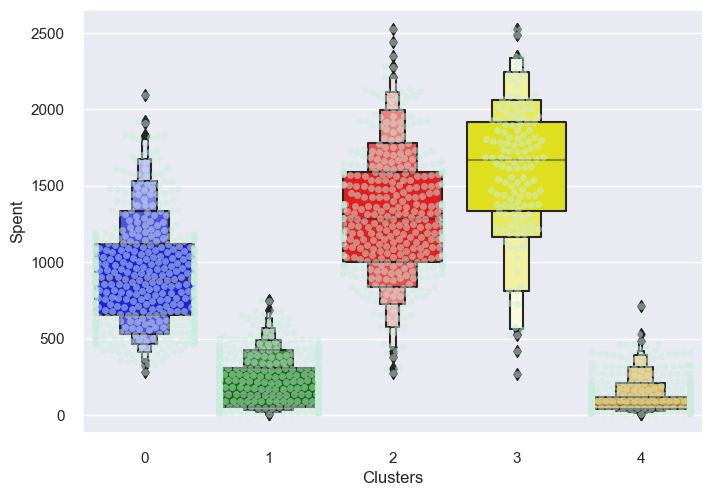

In [49]:
plt.figure()
sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=palette)
plt.show()

From the above plot, it can be clearly seen that cluster 2 and cluster 3 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

**Plotting the number of deals purchased**

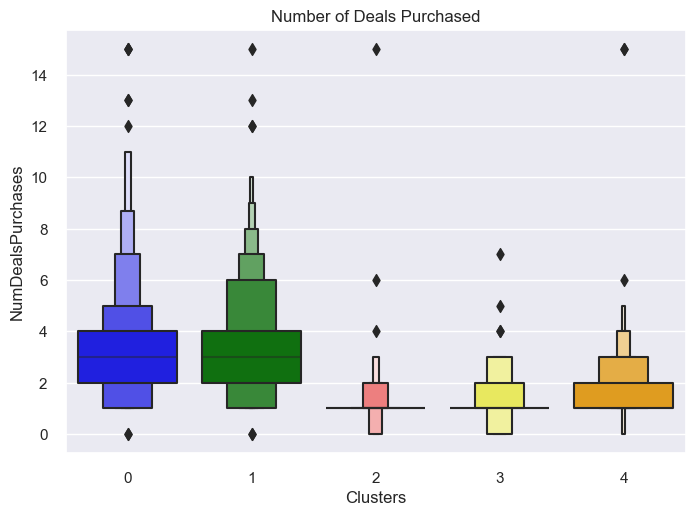

In [50]:
plt.figure()
sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= palette)
plt.title("Number of Deals Purchased")
plt.show()

Deals offered has best outcome with cluster 0 and cluster 1. However, our star customers cluster 3 are not much into the deals. Nothing seems to attract cluster 2 overwhelmingly

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>PROFILING</b></font>
  </span>
</center>

**I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.**

<Figure size 800x550 with 0 Axes>

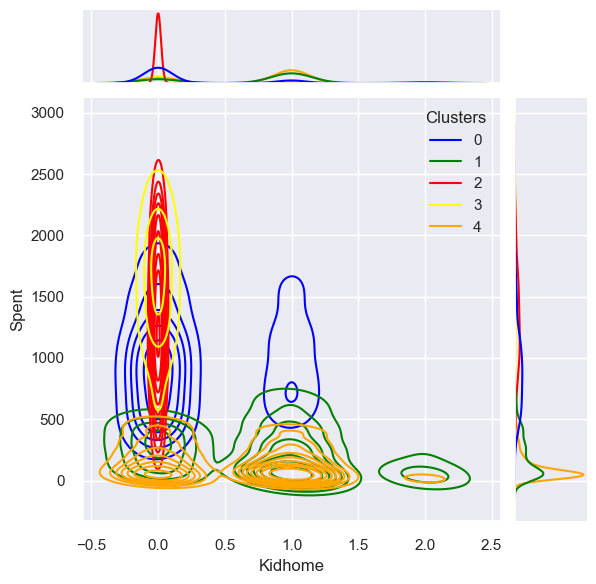

<Figure size 800x550 with 0 Axes>

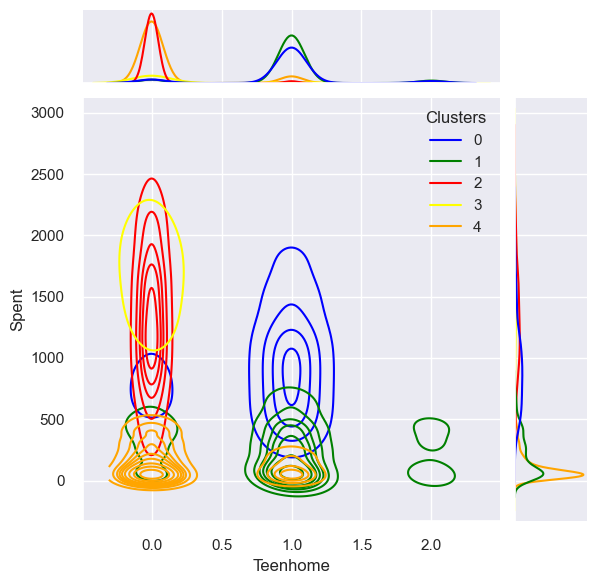

<Figure size 800x550 with 0 Axes>

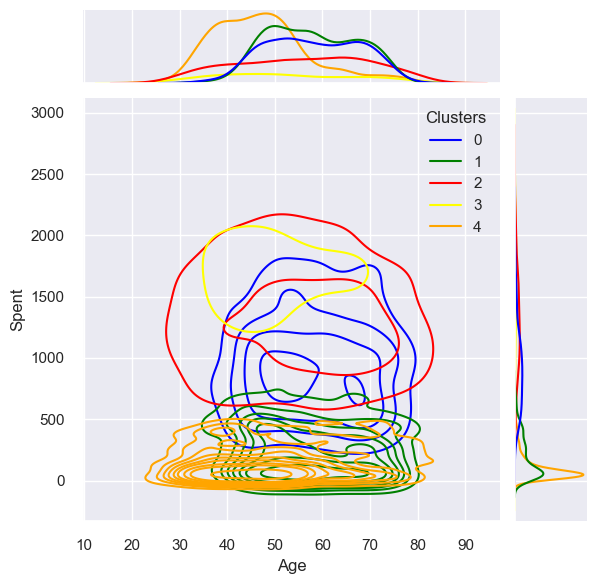

<Figure size 800x550 with 0 Axes>

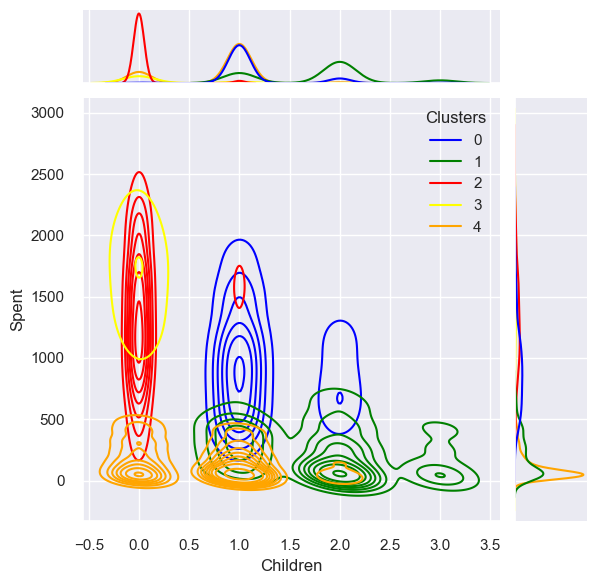

<Figure size 800x550 with 0 Axes>

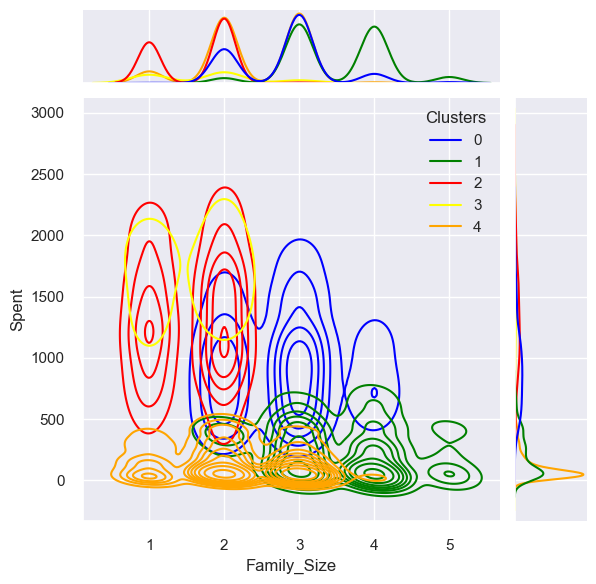

<Figure size 800x550 with 0 Axes>

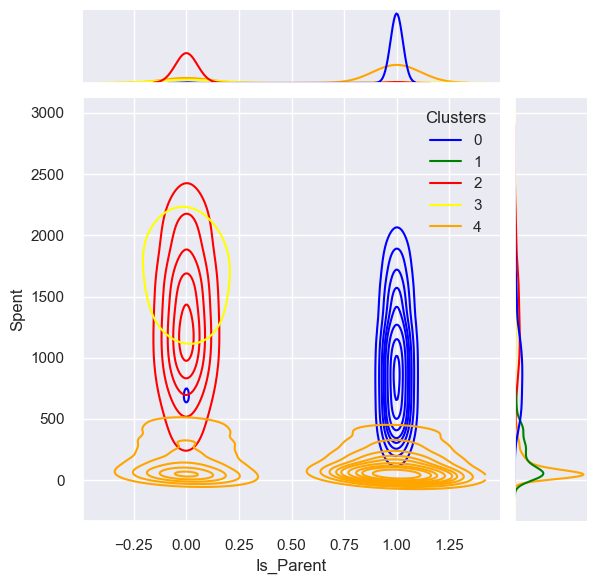

<Figure size 800x550 with 0 Axes>

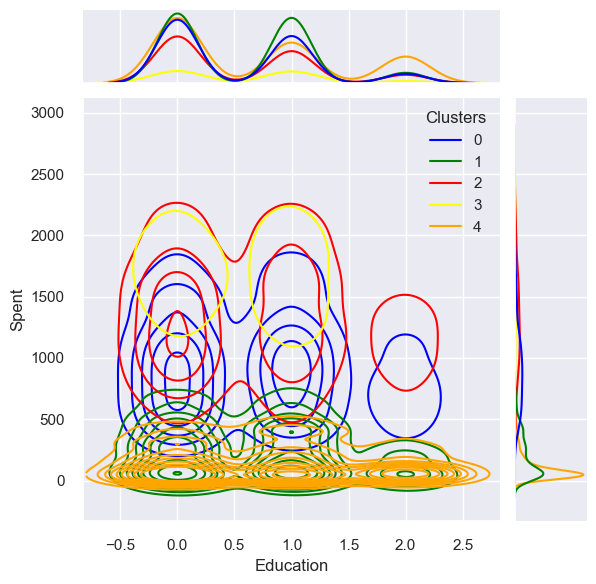

<Figure size 800x550 with 0 Axes>

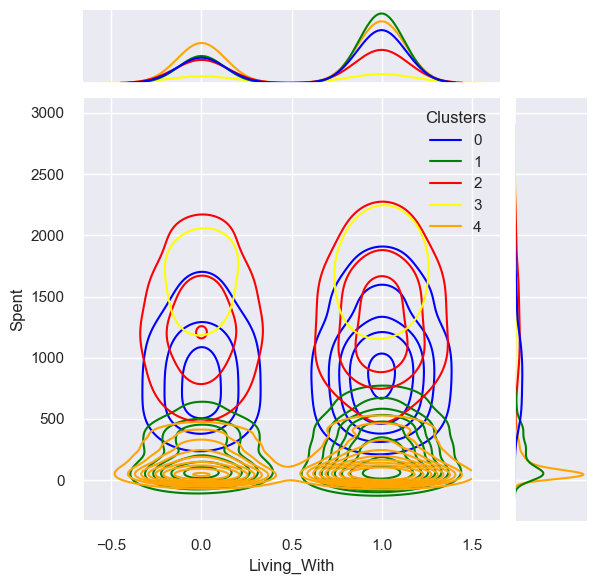

In [51]:
Personal = [ "Kidhome","Teenhome", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    palette = ['blue', 'green', 'red', 'yellow', 'orange']
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde",palette=palette)
    plt.show()

# <U>Profiling the Clusters:-<U> #

## <U>About Cluster 0<U> ##

- They are definitely a parent.
- Most have a teenager at home.
- Relatively older
- A High income group
- At the max have 4 members in the family and atleast 2

## <U>About Cluster 1<U> ##

- They are definitely a parent
- Most of them have teenager at home
- Relatively older
- A lower-income group
- At the max have 5 members in the family and atleast 2

## <U>About cluster 2<U> ##

- They are a definitely not a parent
- Span all ages
- A very high income group
- A slight majority of couple over a single one
- At the max are only 2 members in the family

## <U>About Cluster 3<U> ##

- They are also definitely not a parent
- A very very high income group among others
- A slight majority of couple over a single one
- At the max are only 2 members in the family

## <U>About Cluster 4<U> ##

- The majority of these people are parents
- They majority have one kid(and not teenagers)
- Relatively younger
- A very less income group
- At the max are 3 members in the family

<center>
  <span style="padding: 10px; border-radius: 5px;">
    <font color="#800000" size="5"><b>CONCLUSION</b></font>
  </span>
</center>

In this project, I performed unsupervised clustering. I did use dimensionality reduction followed by k-means clustering. I came up with 5 clusters and further used them in profiling customers in clusters according to their family structures and income/spending. This can be used in planning better marketing strategies.